<p style="text-align: center">
<img src="../../assets/images/dtlogo.png" alt="Duckietown" width="50%">
</p>

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import cv2

import duckietown_code_utils as dcu

%matplotlib inline
%pylab inline

DEBUG:commons:version: 6.2.4 *
DEBUG:typing:version: 6.2.3
DEBUG:geometry:PyGeometry-z6 version 2.1.4 path /usr/local/lib/python3.8/dist-packages


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Image filtering

Now we want to use our image manipulation techniques to do some basic filtering of the images. We'll learn how in this activity, and at the end, you will update the file `preprocessing.py` so that we can send images with highlighted duckies to our Braitenberg agent.

In particular, let's say we want to avoid hitting duckies.

We then need to highlight our duckies in the image.

Let's start by loading a test image to work with as we did in the last activity.

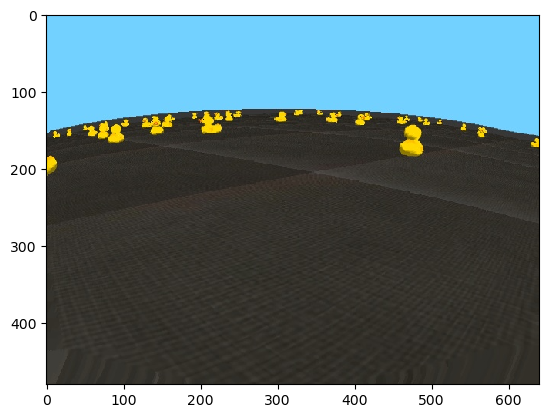

In [3]:
# experiment with different images!
fn = '../../assets/samples/many-duckies/duckies_sim.png'
image = dcu.rgb_from_jpg_fn(fn)
plt.imshow(image);

Let's now convert it to [HSV color space](https://en.wikipedia.org/wiki/HSL_and_HSV) so that it is easier to filter by colors.


In [4]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

In OpenCV, the convention is the following:

* Hue is usually measured in degrees, 0 to 360, as shown in [this scale](../../assets/HUE.png). However OpenCV uses a scale 0 to 179 - multiply by 2 to get the actual Hue in degree. (so to get a hue of 180 you have to tell 90 to OpenCV.
* S and V are from 0 to 255.

Now let's apply a simple image processing technique to highlight the region corresponding to a certain color.


To do this, we start by defining a region in HSV space with the following lower/upper bounds:


In [5]:
lower_hsv = np.array([171, 120, 0])
upper_hsv = np.array([179, 255, 255])

In [6]:
yellow_lower = np.array([0, 70, 80])
yellow_upper = np.array([60, 255, 255])

The two arrays have 3 components: H(ue), S(aturation), V(value).

The first array are the lower bounds; the second array are the upper bounds.

This means that the bounds we defined above will allow us to select the pixels that have:

* Hue between OpenCV value 171 and 179, which are regular Hue values 342 to 358.
* Saturation between 140 and 200.
* Value between 0 and 255.



The *hue* is closest to what we intuitively call "color" and the one to use to do simple processing.

This is how to use our upper and lower bound to do the filtering of the image and show the result:

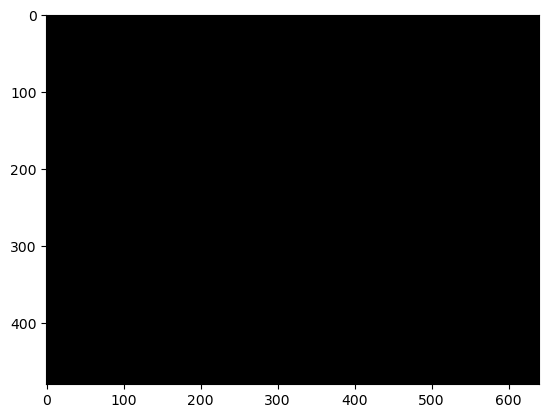

In [7]:
# Returns a matrix of 0 or 1 that satisfy the constraint (pixels within our defined bounds)
mask = cv2.inRange(hsv, lower_hsv, upper_hsv)
mask1 = cv2.inRange(hsv, yellow_lower, yellow_upper)

# Get a "masked image"
masked = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(masked);

The bounds we just used highlight the beak. But we want the yellow of the duckie!

## Activity

Your task now is to change those numbers above so that we highlight the duckies.


We've created a tool for you to make this easier and suggest you use the following steps:

1. Use [this online color picker](https://pinetools.com/image-color-picker) to click around on the sample images in the `/assets/samples` directory and get familiar with what color corresponds to which HSV values. (You can use any other tool, the link is just for reference.)  This will set you up to narrow in on the duckie yellow more quickly.

2. Use the tool [shown in this video](https://vimeo.com/534995276) to find the values interactively. It runs the code in [HSV-bound.py](../../packages/examples/HSV-bound.py) to filter a test image based on the values you choose.

    To get this interactive method running, open a terminal on your computer, **navigate to the exercise folder** (`duckietown-lx/braitenberg/`) and type:

    `dts code build`

    to build your updated exercise. Then use

    `dts code workbench --sim -L HSV`

    to run the HSV tool. In the terminal output you will see lines like the following (you may have to scroll up in the terminal)

    ```
    VNC running at http://localhost:8087/
    --------------------------------------------------------
    ```

    Following the link will bring up the VNC desktop, where you can click on the HSV activity icon and run the tool.

3. After you have a satisfactory result in the VNC tool, open the file [preprocessing.py](../../packages/solution/preprocessing.py), and change the values of `lower_hsv` and `upper_hsv` to the ones that you found to highlight the duckie.  This will be used by your Braitenberg agent in the next notebook.

For reference, this is what your end result should look like.

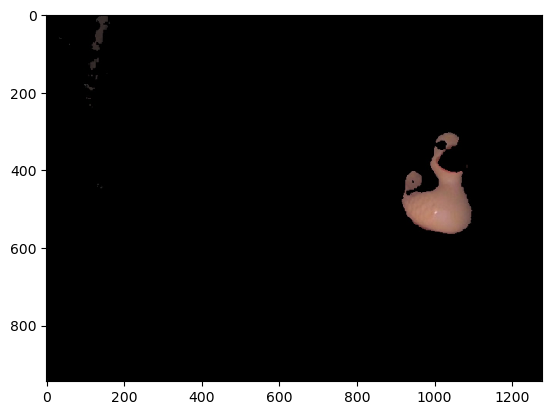

In [117]:
result_img = '../../assets/samples/result.jpg'
result = dcu.rgb_from_jpg_fn(result_img)
plt.imshow(result);

Now go on to the [third notebook](../03-Braitenberg/braitenberg03.ipynb).
